1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

scaled data: [[-0.56185034 -1.0732122   3.26426007 ... -1.73310728  0.01241084
  -1.41424283]
 [-1.25085486  2.07465383 -1.05339247 ...  0.04218487 -1.10126038
  -0.32582923]
 [ 1.81270521 -1.00144163 -2.2108676  ...  1.69092242  1.08884953
   1.74007206]]
shape: (3, 1000)

Covariance matrix:
 [[ 4.29409905 -1.47850195 -2.8155971 ]
 [-1.47850195  1.32897567  0.14952628]
 [-2.8155971   0.14952628  2.66607082]] 


EIGENDECOMPOSITION OF THE COVARIANCE MATRIX:

Eigenvalues:
 [ 6.71656188e+00 -5.86947881e-16  1.57258366e+00] 

Eigenvectors:
 [[-0.79433791  0.57735027  0.18892841]
 [ 0.23355215  0.57735027 -0.78238102]
 [ 0.56078576  0.57735027  0.59345261]] 

are eigenvectors orthogonal to each other? (True, True, True)

SVD ON THE COVARIANCE MATRIX:

shapes: U = (3, 3) D: (3,) V^T: (3, 3) 

Spectrum:
 [ 6.71656188  1.57258366 -0.        ] 

U:
 [[-0.79433791  0.18892841  0.57735027]
 [ 0.23355215 -0.78238102  0.57735027]
 [ 0.56078576  0.59345261  0.57735027]] 

V^T:
 [[-0.79433791  0.2335

Text(0.5, 1.0, 'Data projected to PC-1 and PC-2')

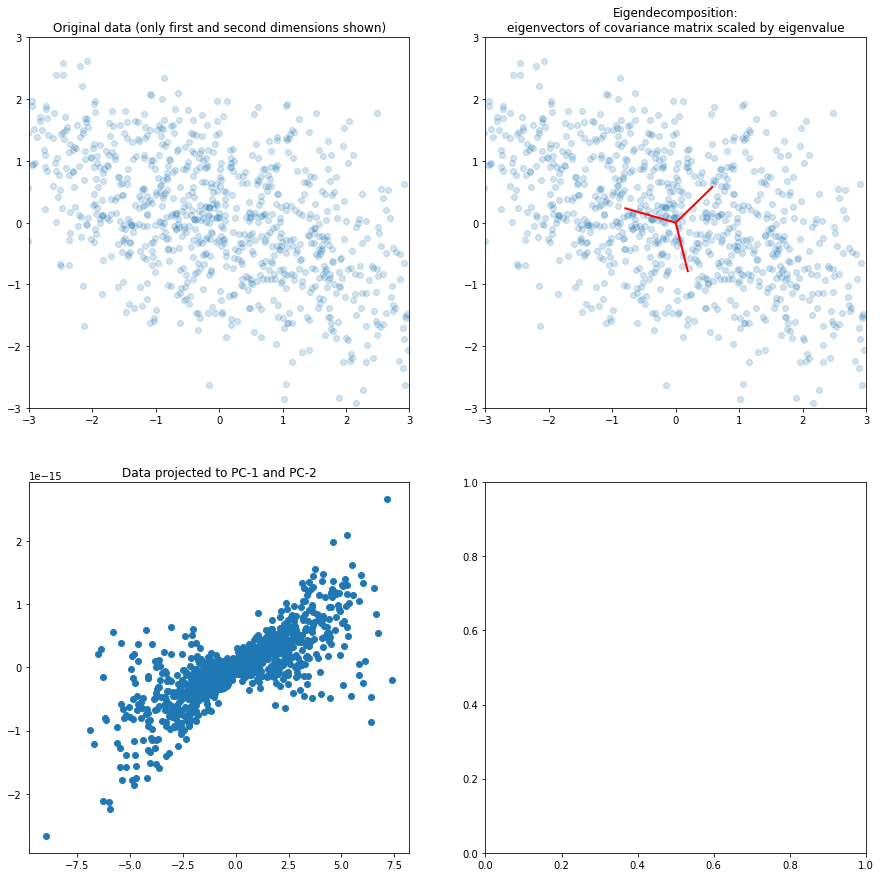

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

n = 1000
x1 = np.random.normal(loc=0,scale=1,size=n)
x2 = x1 + np.random.normal(loc=0,scale=3,size=n)
x3 = 2*x1 + x2

A = np.array([x1,x2,x3])

#let's scale the data subtracting its mean
A = A - np.mean(A , axis = 0)

print("scaled data:",A[:5])
print("shape:",A.shape)

#setting up all plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,15))
ax1.scatter(A[0,:], A[1,:], alpha=0.2)
ax1.set_title("Original data (only first and second dimensions shown)")
ax1.axis([-3, 3, -3, 3])

C = np.cov(A)
print("\nCovariance matrix:\n", C, '\n')

print("\nEIGENDECOMPOSITION OF THE COVARIANCE MATRIX:\n")

# now find the eigenvectors of the covariance matrix
l, V = la.eig(C)
# take only the real component, if possible
l = np.real_if_close(l)
Lambda = np.diag(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')


print("are eigenvectors orthogonal to each other?",(np.allclose(np.dot(V[:,0],V[:,1]),0),np.allclose(np.dot(V[:,1],V[:,2]),0),np.allclose(np.dot(V[:,0],V[:,2]),0)))
res = np.dot(V[:,0],V[:,1])
print("\nSVD ON THE COVARIANCE MATRIX:\n")

# perform the SVD
U, S, Vt = la.svd(C)

print("shapes: U =", U.shape, "D:", S.shape, "V^T:", Vt.shape, '\n')
print("Spectrum:\n", S, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')

#let's calculate the explained variances for every principal component
explained_variances = []
for li in l:
    explained_variances.append(li/Lambda.trace())
print("Total variability retained for each principal component: ",explained_variances,"\n")

# the original data distribution
ax2.scatter(A[0,:], A[1,:], alpha=0.2)

# a scale factor to graphically enhance the lines - only for visualization purposes
scale_factor = 0.5

# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax2.plot([0, vi[0]], [0,  vi[1]], 'r-', lw=2)

# fix the size of the axes to have the right visual effect
ax2.axis([-3, 3, -3, 3])
ax2.set_title('Eigendecomposition:\neigenvectors of covariance matrix scaled by eigenvalue')

#project the data on its principal components
projected_data = np.dot(V.T,A)

ax3.scatter(projected_data[0],projected_data[1])
ax3.set_title("Data projected to PC-1 and PC-2")

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [2]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 